In [12]:
import torch

# Path to the latent variables file
#latent_file = "../examples/torus/Run_w_con_loss_one_variable_usual/LatentCodes/2000.pth"
latent_file = "../examples/torus/LatentCodes/500.pth"

# Load the latent variables
latent_data = torch.load(latent_file)  # Shape: (num_shapes, latent_size)

In [19]:
# Inspect the keys
print(f"Keys in the loaded file: {latent_data.keys()}")

# Extract latent variables
latent_vectors = latent_data['latent_codes']  # Use the key 'latent_codes'

# Extract latent codes from the OrderedDict
latent_list = list(latent_vectors.values())  # Get the values (list of tensors)

# Combine the list into a single tensor
latent_tensor = torch.stack(latent_list)  # Shape: (num_shapes, latent_size)

print(f"Converted latent variables to tensor with shape: {latent_tensor.shape}")

Keys in the loaded file: dict_keys(['epoch', 'latent_codes'])
Converted latent variables to tensor with shape: torch.Size([1, 369, 16])


In [20]:
epoch = latent_data['epoch']
print(f"Model was saved at epoch: {epoch}")

Model was saved at epoch: 500


In [21]:
latent_tensor = latent_tensor.squeeze(0)  # Remove the batch dimension
print(f"Latent variables shape after squeezing: {latent_tensor.shape}")

Latent variables shape after squeezing: torch.Size([369, 16])


In [22]:
latent_min = torch.min(latent_tensor, dim=0).values
latent_max = torch.max(latent_tensor, dim=0).values

print("Minimum values for each latent variable:", latent_min)
print("Maximum values for each latent variable:", latent_max)

Minimum values for each latent variable: tensor([-0.5850, -0.5478, -0.5110, -0.4600, -0.4609, -0.5051, -0.5048, -0.5205,
        -0.4410, -0.5482, -0.4284, -0.4368, -0.4766, -0.4923, -0.4588, -0.4216])
Maximum values for each latent variable: tensor([0.5749, 0.4901, 0.5947, 0.5852, 0.4897, 0.5256, 0.5273, 0.5325, 0.4127,
        0.5447, 0.5247, 0.4554, 0.6377, 0.5434, 0.4757, 0.5368])


In [23]:
latent_mean = torch.mean(latent_tensor, dim=0)
latent_std = torch.std(latent_tensor, dim=0)

print("Mean for each latent variable:", latent_mean)
print("Standard deviation for each latent variable:", latent_std)

Mean for each latent variable: tensor([ 0.0213,  0.0034,  0.0251,  0.0062, -0.0107,  0.0028,  0.0026,  0.0138,
        -0.0112,  0.0044,  0.0158,  0.0049,  0.0217,  0.0141, -0.0049,  0.0127])
Standard deviation for each latent variable: tensor([0.5736, 0.1927, 0.1838, 0.1924, 0.1936, 0.1858, 0.1859, 0.1929, 0.1872,
        0.1947, 0.1868, 0.1893, 0.1892, 0.1961, 0.1899, 0.1841])


In [24]:
import matplotlib.pyplot as plt

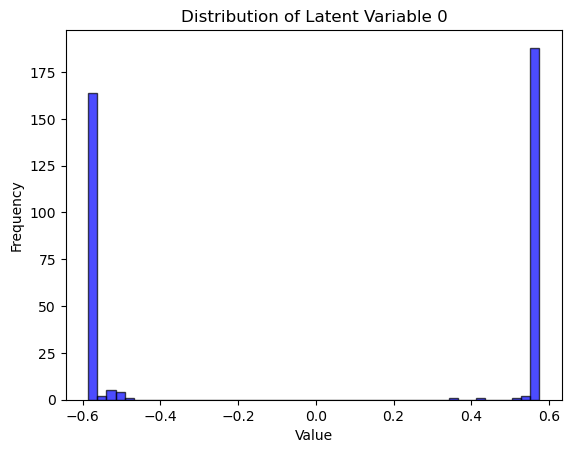

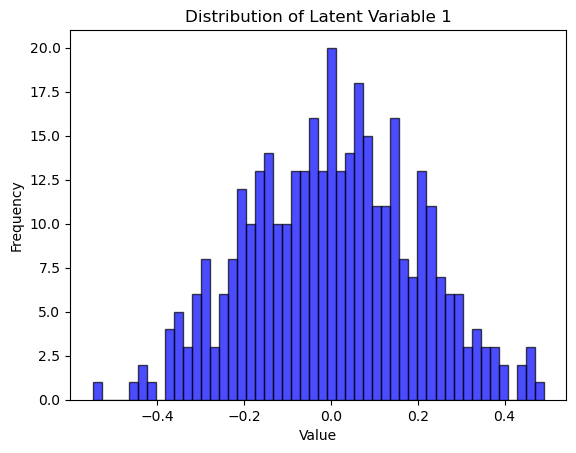

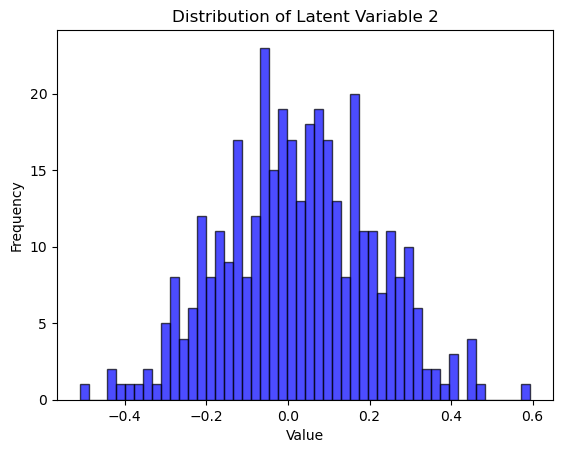

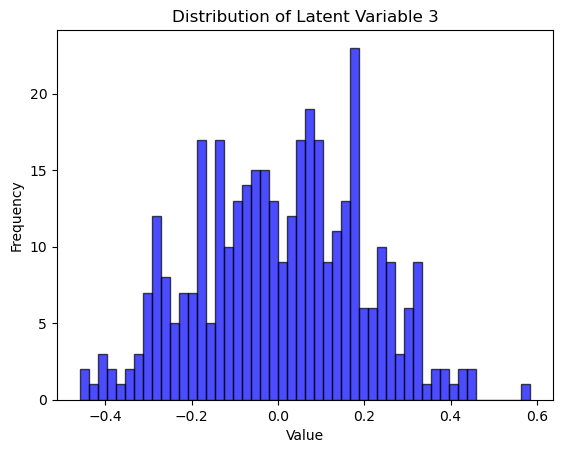

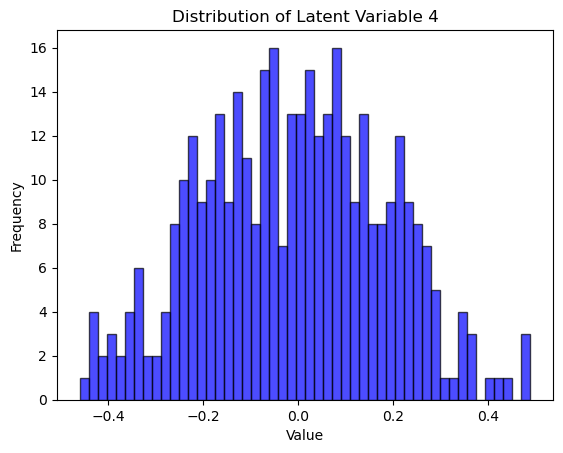

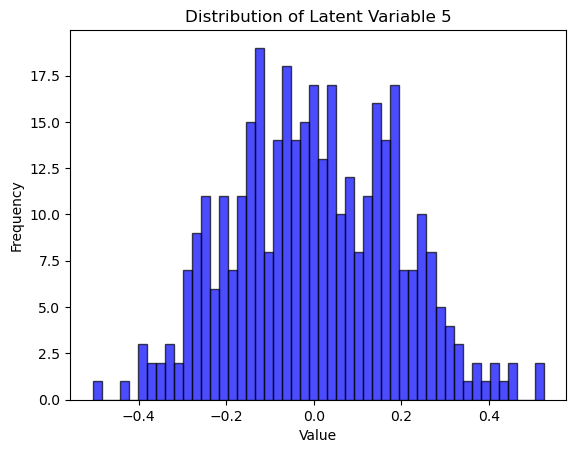

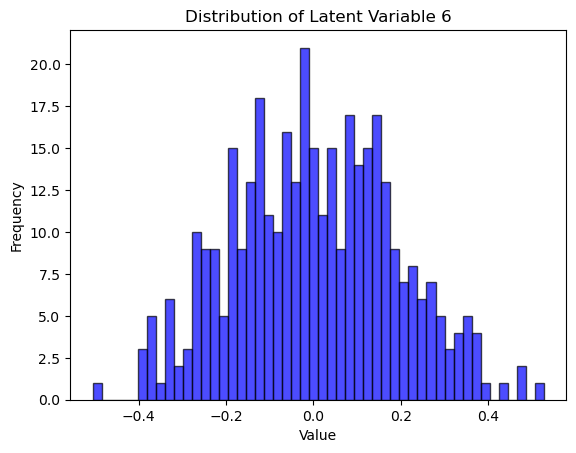

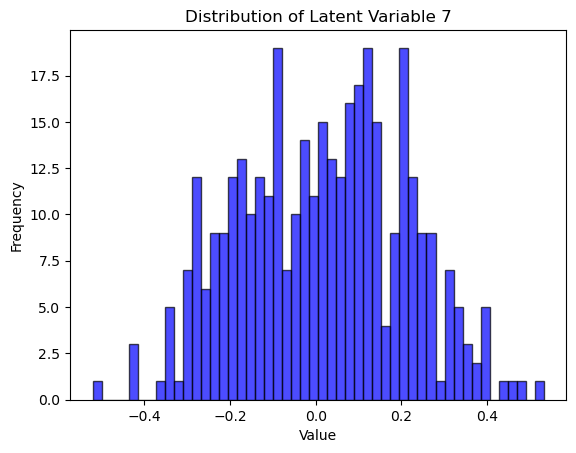

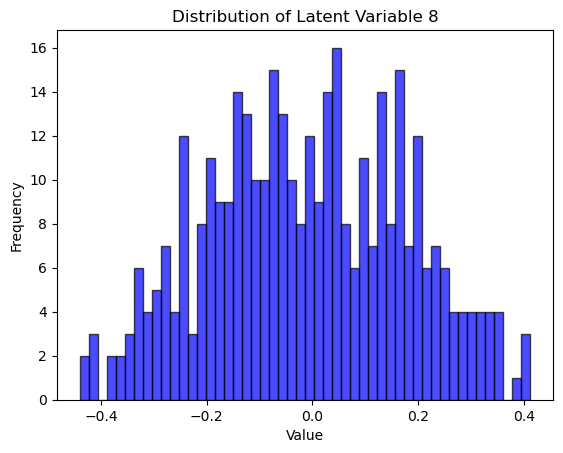

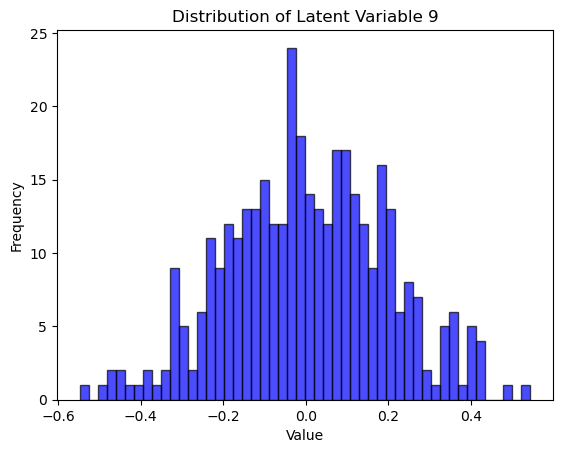

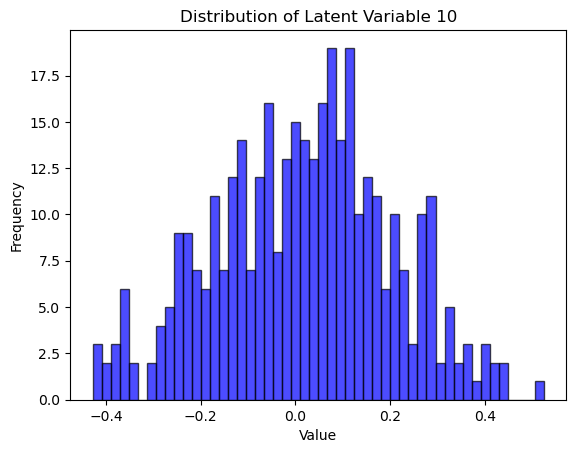

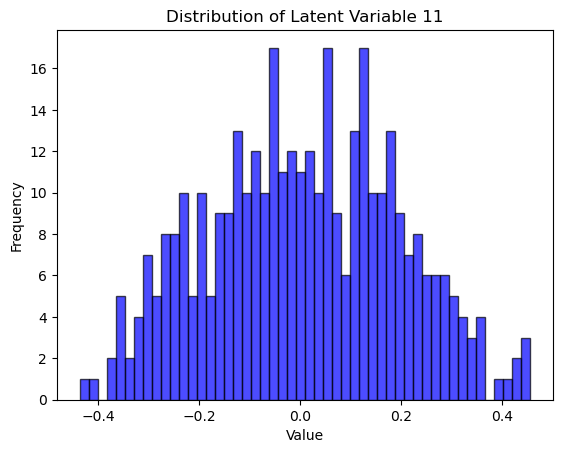

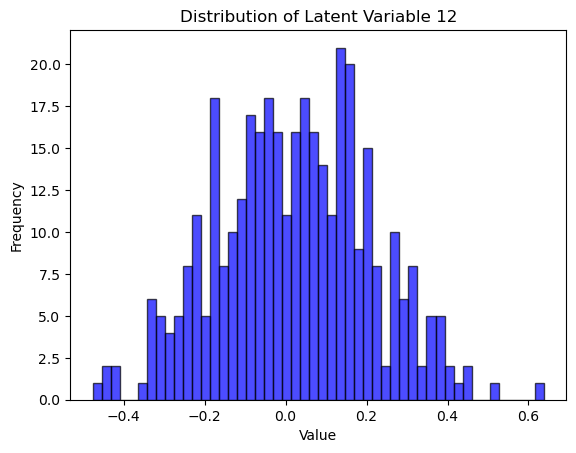

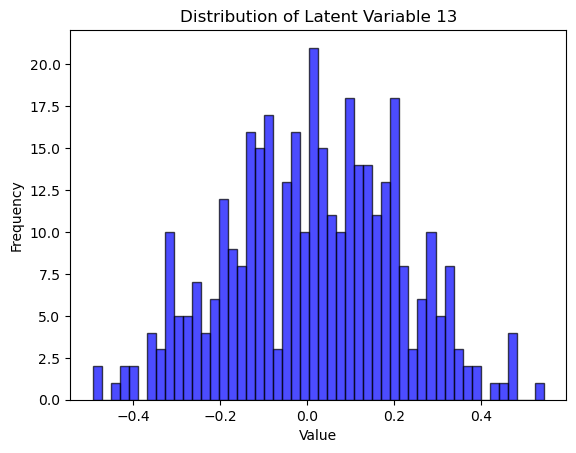

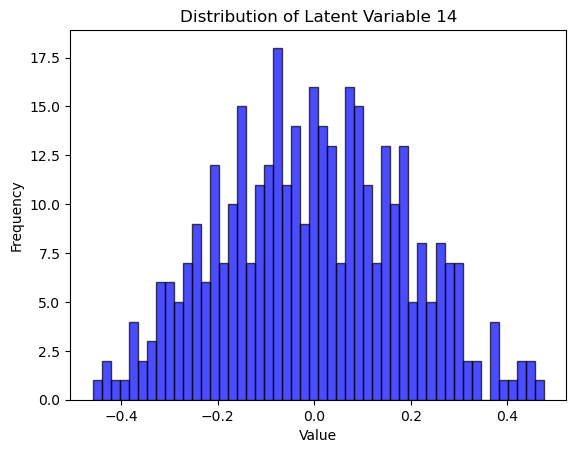

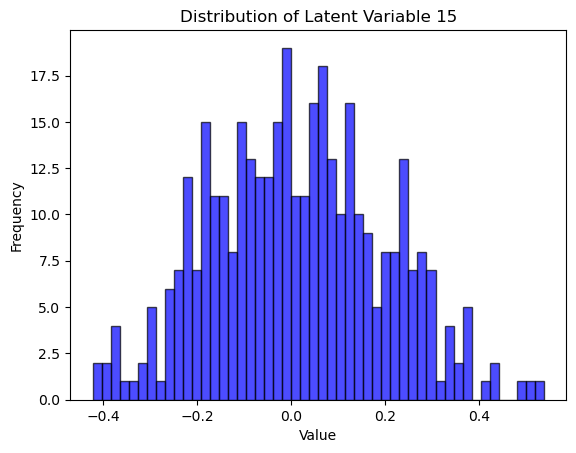

In [25]:
latent_numpy = latent_tensor.cpu().numpy()  # Convert to NumPy for plotting

# Loop over each latent variable and display the plot
for i in range(latent_numpy.shape[1]):
    plt.figure()
    plt.hist(latent_numpy[:, i], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of Latent Variable {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Show the plot inline in the notebook
    plt.show()

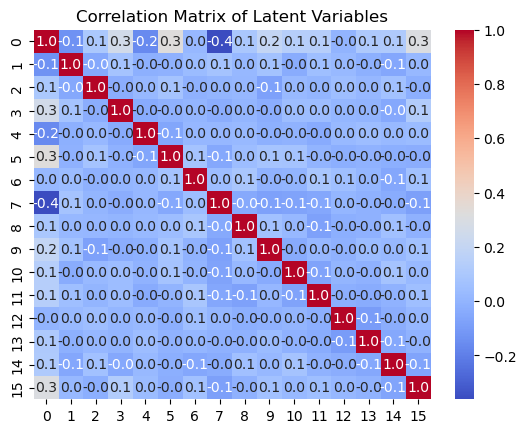

In [26]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr_matrix = np.corrcoef(latent_numpy, rowvar=False)

# Plot the heatmap for visual inspection
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix of Latent Variables")
plt.show()
